In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
csv = pd.read_csv('./channel_sensitivity_Schaefer100_7networks.csv')

In [31]:
[x for x in csv.columns]

['Unnamed: 0',
 '7Networks_LH_Vis_1',
 '7Networks_LH_Vis_2',
 '7Networks_LH_Vis_3',
 '7Networks_LH_Vis_4',
 '7Networks_LH_Vis_5',
 '7Networks_LH_Vis_6',
 '7Networks_LH_Vis_7',
 '7Networks_LH_Vis_8',
 '7Networks_LH_Vis_9',
 '7Networks_LH_SomMot_1',
 '7Networks_LH_SomMot_2',
 '7Networks_LH_SomMot_3',
 '7Networks_LH_SomMot_4',
 '7Networks_LH_SomMot_5',
 '7Networks_LH_SomMot_6',
 '7Networks_LH_DorsAttn_Post_1',
 '7Networks_LH_DorsAttn_Post_2',
 '7Networks_LH_DorsAttn_Post_3',
 '7Networks_LH_DorsAttn_Post_4',
 '7Networks_LH_DorsAttn_Post_5',
 '7Networks_LH_DorsAttn_Post_6',
 '7Networks_LH_DorsAttn_PrCv_1',
 '7Networks_LH_DorsAttn_FEF_1',
 '7Networks_LH_SalVentAttn_ParOper_1',
 '7Networks_LH_SalVentAttn_FrOperIns_1',
 '7Networks_LH_SalVentAttn_FrOperIns_2',
 '7Networks_LH_SalVentAttn_PFCl_1',
 '7Networks_LH_SalVentAttn_Med_1',
 '7Networks_LH_SalVentAttn_Med_2',
 '7Networks_LH_SalVentAttn_Med_3',
 '7Networks_LH_Limbic_OFC_1',
 '7Networks_LH_Limbic_TempPole_1',
 '7Networks_LH_Limbic_TempPole_2

In [5]:
csv.shape

(2206, 101)

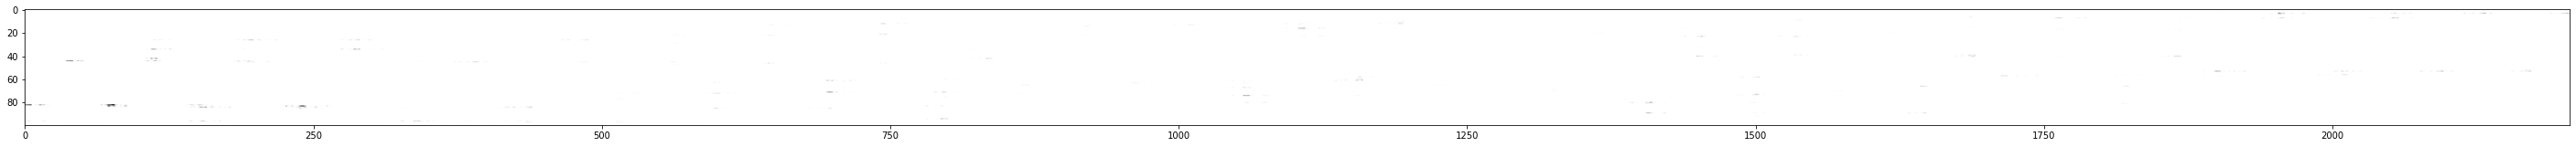

In [29]:
# plt.imshow(csv.values[:, 1:]);
plt.figure(figsize=(50, 30))
plt.imshow((csv.values[:, 1:]).astype(float).T, cmap='binary')